In [40]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [41]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [42]:
X_train.shape

(60000, 28, 28)

In [43]:

X_test.shape

(10000, 28, 28)

In [44]:
single_image= X_train[0]

In [45]:
single_image.shape

(28, 28)

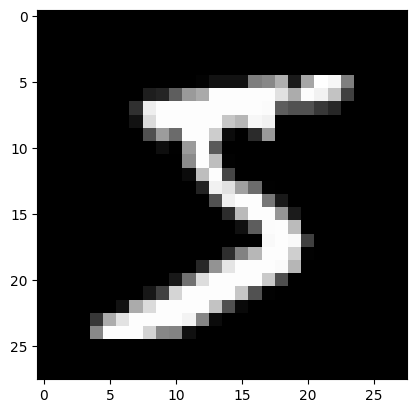

In [46]:

plt.imshow(single_image,cmap='gray')

In [47]:
y_train.shape

(60000,)

In [48]:
X_train.min()

0

In [49]:
X_train.max()

255

In [50]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [51]:
X_train_scaled.min()

0.0

In [52]:
X_train_scaled.max()

1.0

In [53]:
y_train[0]

5

In [54]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [55]:
type(y_train_onehot)

numpy.ndarray

In [56]:
y_train_onehot.shape

(60000, 10)

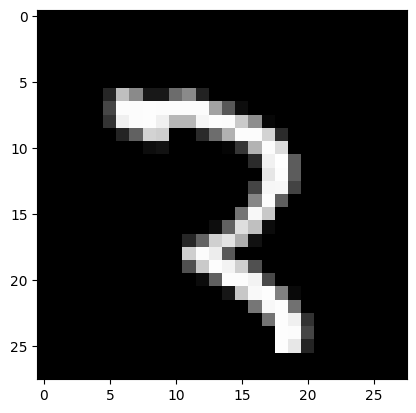

In [57]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [58]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [59]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [60]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [61]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 5408)              0         
                                                                 
 dense_6 (Dense)             (None, 32)                173088    
                                                                 
 dense_7 (Dense)             (None, 64)                2112      
                                                                 
 dense_8 (Dense)             (None, 10)                650       
                                                      

In [62]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')

In [63]:
model.fit(X_train_scaled ,y_train_onehot, epochs=8,batch_size=128, validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/8
469/469 [==============================] - 24s 50ms/step - loss: 0.3208 - accuracy: 0.9088 - val_loss: 0.1097 - val_accuracy: 0.9674
Epoch 2/8
469/469 [==============================] - 25s 54ms/step - loss: 0.0945 - accuracy: 0.9721 - val_loss: 0.0679 - val_accuracy: 0.9786
Epoch 3/8
469/469 [==============================] - 21s 45ms/step - loss: 0.0614 - accuracy: 0.9816 - val_loss: 0.0557 - val_accuracy: 0.9817
Epoch 4/8
469/469 [==============================] - 23s 50ms/step - loss: 0.0462 - accuracy: 0.9859 - val_loss: 0.0557 - val_accuracy: 0.9801
Epoch 5/8
469/469 [==============================] - 22s 48ms/step - loss: 0.0377 - accuracy: 0.9885 - val_loss: 0.0556 - val_accuracy: 0.9828
Epoch 6/8
469/469 [==============================] - 22s 48ms/step - loss: 0.0304 - accuracy: 0.9907 - val_loss: 0.0454 - val_accuracy: 0.9847
Epoch 7/8
469/469 [==============================] - 20s 44ms/step - loss: 0.0246 - accuracy: 0.9923 - val_loss: 0.0516 - val_accuracy: 0.9833

In [65]:
metrics = pd.DataFrame(model.history.history)
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.320775,0.908800,0.109742,0.9674
1,0.094461,0.972117,0.067943,0.9786
2,0.061351,0.981583,0.055740,0.9817
3,0.046182,0.985883,0.055674,0.9801
4,0.037654,0.988467,0.055576,0.9828


<Axes: >

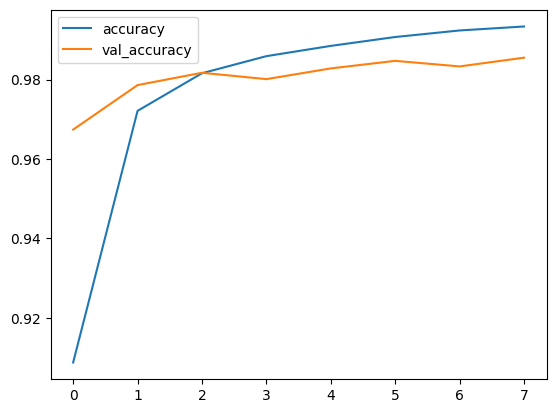

In [66]:
metrics[['accuracy','val_accuracy']].plot()

<Axes: >

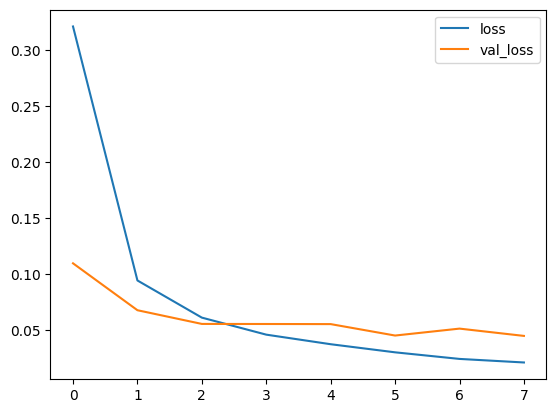

In [67]:
metrics[['loss','val_loss']].plot()

In [68]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 [==============================] - 3s 8ms/step


In [69]:
print(confusion_matrix(y_test,x_test_predictions))

[[ 975    0    1    1    0    1    2    0    0    0]
 [   0 1133    0    1    0    0    0    1    0    0]
 [   2    2 1011    2    1    0    0   11    2    1]
 [   0    0    0  997    0    5    0    3    2    3]
 [   0    0    1    0  970    0    2    1    0    8]
 [   2    0    0    5    0  881    4    0    0    0]
 [   7    3    0    1    3    5  936    0    3    0]
 [   0    1    2    0    0    1    0 1022    1    1]
 [   5    0    5    6    2    2    1    7  940    6]
 [   0    0    0    1    8    4    0    5    1  990]]


In [70]:
print(classification_report(y_test,x_test_predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.98      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.98      0.98       958
           7       0.97      0.99      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [82]:
# Prediction for a single input
img = image.load_img('5.jpg')

In [85]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [83]:
img = image.load_img('5.jpg')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [84]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 20ms/step


In [91]:
print(x_single_prediction)

[5]


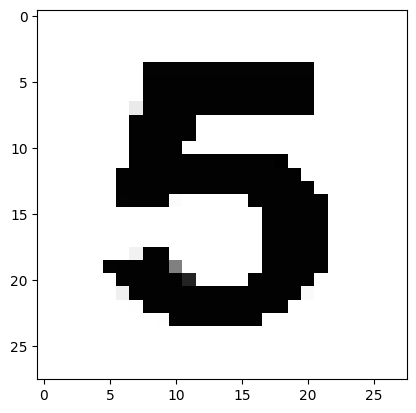

In [86]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [88]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

In [89]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 20ms/step


In [90]:
print(x_single_prediction)

[5]
